In [1]:
import pandas as pd
from pandas import Series

In [2]:
obj = Series([3,4,9,12])

In [5]:
obj

0     3
1     4
2     9
3    12
dtype: int64

In [6]:
# numpyのアレイとPandasのSeriesの違いは、各要素にインデックスが付いている点
# インデックスを文字にすることもできる

In [7]:
obj.values
# valuesはSeries内のデータだけを取り出せる
# これはNumpyのアレイ型になっている

array([ 3,  4,  9, 12])

In [9]:
obj.index
# indexのみをとりだす

RangeIndex(start=0, stop=4, step=1)

In [10]:
# 第二次世界大戦における国別の死者数
# 個別のデータにラベルをつけることができる
ww2_cas = Series([8700000,4300000,3000000,2100000,400000],index=['USSR','Germany','China','Japan','USA'])

In [11]:
ww2_cas

USSR       8700000
Germany    4300000
China      3000000
Japan      2100000
USA         400000
dtype: int64

In [12]:
ww2_cas['USA']

400000

In [14]:
# シリーズの機能には条件を付与して特定のデータのみを取り出すことが可能になる
ww2_cas[ww2_cas>4000000]

USSR       8700000
Germany    4300000
dtype: int64

In [15]:
# 条件に合うかどうかの真偽値のSeriesを返し、これに基づいて元のSeriesからデータを抜き出していることがわかる
ww2_cas>4000000

USSR        True
Germany     True
China      False
Japan      False
USA        False
dtype: bool

In [16]:
'USSR' in ww2_cas

True

In [17]:
ww2_dict = ww2_cas.to_dict()

In [18]:
# to_dictメソッドはPython型の辞書を作ることもできる
ww2_dict

{'USSR': 8700000,
 'Germany': 4300000,
 'China': 3000000,
 'Japan': 2100000,
 'USA': 400000}

In [19]:
# 辞書を基にSeriesを作ることもできる
ww2_Series = Series(ww2_dict)

In [20]:
ww2_Series

USSR       8700000
Germany    4300000
China      3000000
Japan      2100000
USA         400000
dtype: int64

In [27]:
countries = ['China','Germany','Japan','USA','USSR','Argentina']

In [28]:
obj2 = Series(ww2_dict, index = countries)

In [29]:
# 辞書内にデータがないため、Argentinaはnullとなる
obj2

China        3000000.0
Germany      4300000.0
Japan        2100000.0
USA           400000.0
USSR         8700000.0
Argentina          NaN
dtype: float64

In [30]:
# pdにはnullがあるかを調べるメソッドがある
pd.isnull(obj2)

China        False
Germany      False
Japan        False
USA          False
USSR         False
Argentina     True
dtype: bool

In [31]:
pd.notnull(obj2)

China         True
Germany       True
Japan         True
USA           True
USSR          True
Argentina    False
dtype: bool

In [32]:
ww2_Series

USSR       8700000
Germany    4300000
China      3000000
Japan      2100000
USA         400000
dtype: int64

In [33]:
obj2

China        3000000.0
Germany      4300000.0
Japan        2100000.0
USA           400000.0
USSR         8700000.0
Argentina          NaN
dtype: float64

In [35]:
# インデックスが揃っている場合は足すことができる
ww2_Series + obj2

Argentina           NaN
China         6000000.0
Germany       8600000.0
Japan         4200000.0
USA            800000.0
USSR         17400000.0
dtype: float64

In [37]:
# シリーズ全体に名前をつける(Python2ではuが必要)
obj2.name = '第二次世界大戦の死者数'

In [38]:
obj2

China        3000000.0
Germany      4300000.0
Japan        2100000.0
USA           400000.0
USSR         8700000.0
Argentina          NaN
Name: 第二次世界大戦の死者数, dtype: float64

In [41]:
# インデックスに対して名前をつけることもできる
obj2.index.name = 'Countries'

In [42]:
obj2

Countries
China        3000000.0
Germany      4300000.0
Japan        2100000.0
USA           400000.0
USSR         8700000.0
Argentina          NaN
Name: 第二次世界大戦の死者数, dtype: float64

# PandasによるSeriesはNumpyのアレイに似ているが、インデックスによってデータに名前をつけることができる点が便利

In [64]:
# NumpyがPyhtonのlist型のようなものとすると、PandasのSeriesはPythonのdict(辞書)型のようなもの

# DataFrame

In [74]:
pip install --upgrade pip

     |████████████████████████████████| 1.5 MB 3.0 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 20.3
    Uninstalling pip-20.3:
      Successfully uninstalled pip-20.3
Note: you may need to restart the kernel to use updated packages.


In [81]:
!pip3 install lxml

In [31]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [32]:
# DataFrameは辞書やファイルなどから作成できるが、最も簡単な方法としてクリップボードのデータ(コピーしたデータ)を用いることができる

In [33]:
nfL_frame = pd.read_clipboard(sep='\t')
nfL_frame
# 行は特に指定しないため数字となる

,Rank,Team,GP,Won,Lost,Tied,Pct.,First NFL Season,Division
0,1,Dallas Cowboys,925,523,396,6,0.569,1960,NFC East
1,2,Green Bay Packers,1379,764,577,38,0.568,1921,NFC North
2,3,Chicago Bears,1413,774,597,42,0.563,1920,NFC North
3,4,New England Patriots,927,517,401,9,0.563,1960,AFC East
4,5,Baltimore Ravens,395,220,174,1,0.558,1996,AFC North
5,6,Miami Dolphins,843,464,375,4,0.553,1966,AFC East


In [34]:
nfL_frame.columns
# columns:データフレームの列の名称を取り出す

Index(['Rank', 'Team', 'GP', 'Won', 'Lost', 'Tied', 'Pct.', 'First NFL Season',
       'Division'],
      dtype='object')

In [35]:
nfL_frame['First NFL Season']
# 列のデータにアクセス:[列の名称]→PandasのSeriesの形

0    1960
1    1921
2    1920
3    1960
4    1996
5    1966
Name: First NFL Season, dtype: int64

In [36]:
nfL_frame.Team
# Teamのような一つの単語は、Pythonのオブジェクト指向の属性にアクセスする形で列にアクセスすることが可能

0          Dallas Cowboys
1       Green Bay Packers
2           Chicago Bears
3    New England Patriots
4        Baltimore Ravens
5          Miami Dolphins
Name: Team, dtype: object

In [37]:
nfL_frame[['Team','First NFL Season']]
# 複数の時は列名をリストにしてデータフレームにアクセスする

,Team,First NFL Season
0,Dallas Cowboys,1960
1,Green Bay Packers,1921
2,Chicago Bears,1920
3,New England Patriots,1960
4,Baltimore Ravens,1996
5,Miami Dolphins,1966


In [38]:
# 新しいデータフレームの追加
DataFrame(nfL_frame,columns=['Team','First NFL Season'])
# 元データから参照しているわけではないので、これに変更を加えても元データに変更はない

,Team,First NFL Season
0,Dallas Cowboys,1960
1,Green Bay Packers,1921
2,Chicago Bears,1920
3,New England Patriots,1960
4,Baltimore Ravens,1996
5,Miami Dolphins,1966


In [39]:
DataFrame(nfL_frame,columns=['Team','First NFL Season','Stadium'])
# 存在しないデータはnull

,Team,First NFL Season,Stadium
0,Dallas Cowboys,1960,NaN
1,Green Bay Packers,1921,NaN
2,Chicago Bears,1920,NaN
3,New England Patriots,1960,NaN
4,Baltimore Ravens,1996,NaN
5,Miami Dolphins,1966,NaN


In [40]:
nfL_frame.head()
# 行が非常に大きい時、headメソッドを用いて引数を入れないと最初の5行だけを取り出してくれる

,Rank,Team,GP,Won,Lost,Tied,Pct.,First NFL Season,Division
0,1,Dallas Cowboys,925,523,396,6,0.569,1960,NFC East
1,2,Green Bay Packers,1379,764,577,38,0.568,1921,NFC North
2,3,Chicago Bears,1413,774,597,42,0.563,1920,NFC North
3,4,New England Patriots,927,517,401,9,0.563,1960,AFC East
4,5,Baltimore Ravens,395,220,174,1,0.558,1996,AFC North


In [41]:
nfL_frame.head(3)

,Rank,Team,GP,Won,Lost,Tied,Pct.,First NFL Season,Division
0,1,Dallas Cowboys,925,523,396,6,0.569,1960,NFC East
1,2,Green Bay Packers,1379,764,577,38,0.568,1921,NFC North
2,3,Chicago Bears,1413,774,597,42,0.563,1920,NFC North


In [42]:
nfL_frame.tail()
# tailメソッドは最後から5行目まで

,Rank,Team,GP,Won,Lost,Tied,Pct.,First NFL Season,Division
1,2,Green Bay Packers,1379,764,577,38,0.568,1921,NFC North
2,3,Chicago Bears,1413,774,597,42,0.563,1920,NFC North
3,4,New England Patriots,927,517,401,9,0.563,1960,AFC East
4,5,Baltimore Ravens,395,220,174,1,0.558,1996,AFC North
5,6,Miami Dolphins,843,464,375,4,0.553,1966,AFC East


In [43]:
nfL_frame.tail(3)

,Rank,Team,GP,Won,Lost,Tied,Pct.,First NFL Season,Division
3,4,New England Patriots,927,517,401,9,0.563,1960,AFC East
4,5,Baltimore Ravens,395,220,174,1,0.558,1996,AFC North
5,6,Miami Dolphins,843,464,375,4,0.553,1966,AFC East


In [46]:
# 行の抽出
nfL_frame.iloc[2:5]
# 位置インデックスで取る場合はilocメソッド

,Rank,Team,GP,Won,Lost,Tied,Pct.,First NFL Season,Division
2,3,Chicago Bears,1413,774,597,42,0.563,1920,NFC North
3,4,New England Patriots,927,517,401,9,0.563,1960,AFC East
4,5,Baltimore Ravens,395,220,174,1,0.558,1996,AFC North


In [47]:
nfL_frame.loc[2:5]
# ラベルインデックスで取る場合はlocメソッド

,Rank,Team,GP,Won,Lost,Tied,Pct.,First NFL Season,Division
2,3,Chicago Bears,1413,774,597,42,0.563,1920,NFC North
3,4,New England Patriots,927,517,401,9,0.563,1960,AFC East
4,5,Baltimore Ravens,395,220,174,1,0.558,1996,AFC North
5,6,Miami Dolphins,843,464,375,4,0.553,1966,AFC East


In [48]:
nfL_frame.iloc[2]
# 特定の行を取り出す場合はilocでもlocでもよい

Rank                            3
Team                Chicago Bears
GP                           1413
Won                           774
Lost                          597
Tied                           42
Pct.                        0.563
First NFL Season             1920
Division                NFC North
Name: 2, dtype: object

In [49]:
nfL_frame.loc[2]
# 特定の行を取り出す場合はilocでもlocでもよい

Rank                            3
Team                Chicago Bears
GP                           1413
Won                           774
Lost                          597
Tied                           42
Pct.                        0.563
First NFL Season             1920
Division                NFC North
Name: 2, dtype: object

In [51]:
# 新たな列を代入する
nfL_frame["Stadium"]="Levi's Staduim"

In [52]:
nfL_frame

,Rank,Team,GP,Won,Lost,Tied,Pct.,First NFL Season,Division,Stadium
0,1,Dallas Cowboys,925,523,396,6,0.569,1960,NFC East,Levi's Staduim
1,2,Green Bay Packers,1379,764,577,38,0.568,1921,NFC North,Levi's Staduim
2,3,Chicago Bears,1413,774,597,42,0.563,1920,NFC North,Levi's Staduim
3,4,New England Patriots,927,517,401,9,0.563,1960,AFC East,Levi's Staduim
4,5,Baltimore Ravens,395,220,174,1,0.558,1996,AFC North,Levi's Staduim
5,6,Miami Dolphins,843,464,375,4,0.553,1966,AFC East,Levi's Staduim


In [53]:
nfL_frame["Stadium"]=np.arange(6)
# numpyのarangeでアレイを作り、それをStadiumの列に流すことが可能

In [54]:
nfL_frame

,Rank,Team,GP,Won,Lost,Tied,Pct.,First NFL Season,Division,Stadium
0,1,Dallas Cowboys,925,523,396,6,0.569,1960,NFC East,0
1,2,Green Bay Packers,1379,764,577,38,0.568,1921,NFC North,1
2,3,Chicago Bears,1413,774,597,42,0.563,1920,NFC North,2
3,4,New England Patriots,927,517,401,9,0.563,1960,AFC East,3
4,5,Baltimore Ravens,395,220,174,1,0.558,1996,AFC North,4
5,6,Miami Dolphins,843,464,375,4,0.553,1966,AFC East,5


In [56]:
# シリーズを作ってデータフレームに追加することも可能
stadiums = Series(["Levi's stadium","AT&T stadium"],index=[4,0])

In [59]:
stadiums
# インデックスがついて値の入ったシリーズができる

4    Levi's stadium
0      AT&T stadium
dtype: object

In [60]:
nfL_frame["Stadium"] = stadiums

In [61]:
nfL_frame
# これによりインデックスに応じて値を入れることが可能

,Rank,Team,GP,Won,Lost,Tied,Pct.,First NFL Season,Division,Stadium
0,1,Dallas Cowboys,925,523,396,6,0.569,1960,NFC East,AT&T stadium
1,2,Green Bay Packers,1379,764,577,38,0.568,1921,NFC North,NaN
2,3,Chicago Bears,1413,774,597,42,0.563,1920,NFC North,NaN
3,4,New England Patriots,927,517,401,9,0.563,1960,AFC East,NaN
4,5,Baltimore Ravens,395,220,174,1,0.558,1996,AFC North,Levi's stadium
5,6,Miami Dolphins,843,464,375,4,0.553,1966,AFC East,NaN


In [62]:
# 列の削除:del
del nfL_frame["Stadium"]

In [63]:
nfL_frame

,Rank,Team,GP,Won,Lost,Tied,Pct.,First NFL Season,Division
0,1,Dallas Cowboys,925,523,396,6,0.569,1960,NFC East
1,2,Green Bay Packers,1379,764,577,38,0.568,1921,NFC North
2,3,Chicago Bears,1413,774,597,42,0.563,1920,NFC North
3,4,New England Patriots,927,517,401,9,0.563,1960,AFC East
4,5,Baltimore Ravens,395,220,174,1,0.558,1996,AFC North
5,6,Miami Dolphins,843,464,375,4,0.553,1966,AFC East


In [64]:
# データフレームを辞書形から作る
data = {"City":["SF","LA","NYC"],"Population":[837000,3880000,840000]}

In [65]:
data

{'City': ['SF', 'LA', 'NYC'], 'Population': [837000, 3880000, 840000]}

In [66]:
# これを基にデータフレームを作る
city_frame = DataFrame(data)

In [67]:
city_frame

,City,Population
0,SF,837000
1,LA,3880000
2,NYC,840000


# indexの基本

In [69]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [70]:
# サンプルとしてシリーズの作成
my_ser = Series([1,2,3,4],index=["A","B","C","D"])

In [71]:
my_ser

A    1
B    2
C    3
D    4
dtype: int64

In [75]:
# シリーズからインデックスだけを取り出す
my_index = my_ser.index

In [76]:
my_index

Index(['A', 'B', 'C', 'D'], dtype='object')

In [77]:
my_index[0]

'A'

In [78]:
my_index[3]

'D'

In [79]:
my_index[2:]

Index(['C', 'D'], dtype='object')

In [81]:
my_index[0] = "z"
# Pandasのインデックスは書き換えることができない
# データフレームやシリーズにおけるデータの安全性に重要

TypeError: Index does not support mutable operations

# indexを書き換える

In [99]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from numpy.random import randn
# numpyのrandomモジュールからrandn(正規分布にしたがった乱数を返す関数)を導入
ser1 = Series([1,2,3,4], index = ["A","B","C","D"])

In [100]:
ser1

A    1
B    2
C    3
D    4
dtype: int64

In [101]:
ser2 = ser1.reindex(["A","B","C","D","E","F"])
# reindexメソッド

In [102]:
ser2
# Pandasのシリーズやデータフレームはnullを導入してくれるので扱いが楽

A    1.0
B    2.0
C    3.0
D    4.0
E    NaN
F    NaN
dtype: float64

In [103]:
ser2.reindex(["A","B","C","D","E","F","G"],fill_value=1)
# 新しく作ったインデックスにfill_valueでnull値ではない指定した数字を入れることができる

A    1.0
B    2.0
C    3.0
D    4.0
E    NaN
F    NaN
G    1.0
dtype: float64

In [104]:
ser3 = Series(["USA","Mexico","Canada"],index=[0,5,10])

In [105]:
ser3

0        USA
5     Mexico
10    Canada
dtype: object

In [106]:
ser3.reindex(range(15))
# 0から14まで15個の数字で入れ替える

0        USA
1        NaN
2        NaN
3        NaN
4        NaN
5     Mexico
6        NaN
7        NaN
8        NaN
9        NaN
10    Canada
11       NaN
12       NaN
13       NaN
14       NaN
dtype: object

In [107]:
ser3.reindex(range(15),method="ffill")
# ffill(forwardfill)は本来null値になってしまう部分を前側へ埋めてくれる

0        USA
1        USA
2        USA
3        USA
4        USA
5     Mexico
6     Mexico
7     Mexico
8     Mexico
9     Mexico
10    Canada
11    Canada
12    Canada
13    Canada
14    Canada
dtype: object

In [108]:
ser3.reindex(range(15),method='bfill')
# bfill(backfill)は後ろ側へ埋めてくれる

0        USA
1     Mexico
2     Mexico
3     Mexico
4     Mexico
5     Mexico
6     Canada
7     Canada
8     Canada
9     Canada
10    Canada
11       NaN
12       NaN
13       NaN
14       NaN
dtype: object

In [109]:
# データフレームに関してインデックスを付け替える

In [111]:
dframe = DataFrame(randn(25).reshape((5,5)),index=["A","B","D","E","F"],columns=["col1","col2","col3","col4","col5"])

In [112]:
dframe

,col1,col2,col3,col4,col5
A,0.767543,0.543931,1.765259,0.032009,-0.461573
B,-1.920694,-0.680925,-1.271657,0.315329,-0.127647
D,-2.464047,-1.374481,-1.448941,-1.341569,0.574001
E,-0.178322,-0.117771,0.264558,-0.102301,-1.795169
F,-0.691007,0.976901,0.297268,0.442594,2.111546


In [113]:
new_index = ["A","B","C","D","E","F"]
dframe2 = dframe.reindex(new_index)
# インデックスの追加

In [114]:
dframe2

,col1,col2,col3,col4,col5
A,0.767543,0.543931,1.765259,0.032009,-0.461573
B,-1.920694,-0.680925,-1.271657,0.315329,-0.127647
C,NaN,NaN,NaN,NaN,NaN
D,-2.464047,-1.374481,-1.448941,-1.341569,0.574001
E,-0.178322,-0.117771,0.264558,-0.102301,-1.795169
F,-0.691007,0.976901,0.297268,0.442594,2.111546


In [116]:
new_columns = ["col1","col2","col3","col4","col5","col6"]
dframe2.reindex(columns=new_columns)
# カラムの追加

,col1,col2,col3,col4,col5,col6
A,0.767543,0.543931,1.765259,0.032009,-0.461573,NaN
B,-1.920694,-0.680925,-1.271657,0.315329,-0.127647,NaN
C,NaN,NaN,NaN,NaN,NaN,NaN
D,-2.464047,-1.374481,-1.448941,-1.341569,0.574001,NaN
E,-0.178322,-0.117771,0.264558,-0.102301,-1.795169,NaN
F,-0.691007,0.976901,0.297268,0.442594,2.111546,NaN


In [117]:
dframe

,col1,col2,col3,col4,col5
A,0.767543,0.543931,1.765259,0.032009,-0.461573
B,-1.920694,-0.680925,-1.271657,0.315329,-0.127647
D,-2.464047,-1.374481,-1.448941,-1.341569,0.574001
E,-0.178322,-0.117771,0.264558,-0.102301,-1.795169
F,-0.691007,0.976901,0.297268,0.442594,2.111546


In [130]:
dframe.ix[new_index, new_columns]
# ixは現在対応していない

AttributeError: 'DataFrame' object has no attribute 'ix'

# シリーズやデータフレームから行や列を削除する

In [131]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [132]:
ser1 = Series(np.arange(3),index=["a","b","c"])

In [133]:
ser1

a    0
b    1
c    2
dtype: int64

In [136]:
ser1.drop("b")
# dropメソッド

a    0
c    2
dtype: int64

In [140]:
dframe1 = DataFrame(np.arange(9).reshape((3,3)),index=["SF","LA","NY"],columns=["pop","size","year"])

In [142]:
dframe1

,pop,size,year
SF,0,1,2
LA,3,4,5
NY,6,7,8


In [150]:
dframe1.drop("LA")
# 元のデータフレームから消したわけではなく、消した別のデータフレームを返している
# 行を削除する場合はaxis=0は省略しても良い

,pop,size,year
SF,0,1,2
NY,6,7,8


In [151]:
dframe1

,pop,size,year
SF,0,1,2
LA,3,4,5
NY,6,7,8


In [153]:
dframe1.drop("year",axis=1)
# 列を削除する場合はaxis=1が必要

,pop,size
SF,0,1
LA,3,4
NY,6,7


# データを取り出す

In [154]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [155]:
ser1 = Series(np.arange(3),index=["A","B","C"])

In [164]:
ser1 = ser1*2

In [165]:
ser1

A    0
B    2
C    4
dtype: int64

In [166]:
ser1["B"]

2

In [167]:
ser1[1]
# 数字の添字で返すこともできる

2

In [168]:
ser1[0:3]

A    0
B    2
C    4
dtype: int64

In [170]:
ser1[["A","B"]]
# 文字列を使ったインデックスは、リストを使うと複数同時に指定することが可能

A    0
B    2
dtype: int64

In [172]:
ser1[ser1>3]
# 条件式をそのまま指定することも可能

C    4
dtype: int64

In [175]:
ser1[ser1>3] = 10
# 条件で指定した箇所の値を変更することも可能
ser1

A     0
B     2
C    10
dtype: int64

In [182]:
dframe = DataFrame(np.arange(25).reshape((5,5)),index=["NYC","LA","SF","DC","Chi"],columns=["A","B","C","D","E"])

In [183]:
dframe

,A,B,C,D,E
NYC,0,1,2,3,4
LA,5,6,7,8,9
SF,10,11,12,13,14
DC,15,16,17,18,19
Chi,20,21,22,23,24


In [184]:
dframe["B"]

NYC     1
LA      6
SF     11
DC     16
Chi    21
Name: B, dtype: int64

In [185]:
dframe[["B","C"]]
# 引数にリストを与えれば複数指定できる

,B,C
NYC,1,2
LA,6,7
SF,11,12
DC,16,17
Chi,21,22


In [186]:
dframe[dframe["C"]>8]

,A,B,C,D,E
SF,10,11,12,13,14
DC,15,16,17,18,19
Chi,20,21,22,23,24


In [188]:
dframe>10
# 条件式を指定すると真偽値がそのまま入ったDataFrameを返す

,A,B,C,D,E
NYC,False,False,False,False,False
LA,False,False,False,False,False
SF,False,True,True,True,True
DC,True,True,True,True,True
Chi,True,True,True,True,True


In [193]:
dframe.loc["LA"]

A    5
B    6
C    7
D    8
E    9
Name: LA, dtype: int64

In [195]:
dframe.iloc[1]

A    5
B    6
C    7
D    8
E    9
Name: LA, dtype: int64

# 形の違うデータの計算

In [197]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [198]:
ser1 = Series([0,1,2],index=["A","B","C"])

In [199]:
ser1

A    0
B    1
C    2
dtype: int64

In [200]:
ser2 = Series([3,4,5,6],index=["A","B","C","D"])

In [201]:
ser2

A    3
B    4
C    5
D    6
dtype: int64

In [203]:
ser1 + ser2
# DはNaN(Not an number)

A    3.0
B    5.0
C    7.0
D    NaN
dtype: float64

In [207]:
dframe1 = DataFrame(np.arange(4).reshape((2,2)),columns=list("AB"),index=["NYC","LA"])
# ABそれぞれの要素を持つリストを作る

In [208]:
dframe1

,A,B
NYC,0,1
LA,2,3


In [212]:
dframe2 = DataFrame(np.arange(9).reshape((3,3)),columns=list("ADC"),index=["NYC","SF","LA"])

In [213]:
dframe2

,A,D,C
NYC,0,1,2
SF,3,4,5
LA,6,7,8


In [214]:
dframe1 + dframe2
# 共通のデータを持つ要素以外NaNになる

,A,B,C,D
LA,8.0,NaN,NaN,NaN
NYC,0.0,NaN,NaN,NaN
SF,NaN,NaN,NaN,NaN


In [227]:
# NaN値の解消法
dframe1.add(dframe2,fill_value=0)
# fill_value=0は、どちらかしか持たない要素をそのまま保持できる

,A,B,C,D
LA,8.0,3.0,8.0,7.0
NYC,0.0,1.0,2.0,1.0
SF,3.0,NaN,5.0,4.0


In [228]:
# シリーズとデータフレームの計算
# それぞれ形が異なっていても計算することができる

In [229]:
ser3 = dframe2.iloc[0]
# ilocメソッドを用いて0行目をリストとして取り出した

In [230]:
ser3

A    0
D    1
C    2
Name: NYC, dtype: int64

In [231]:
dframe2 - ser3
# データフレームとシリーズの引き算

,A,D,C
NYC,0,0,0
SF,3,3,3
LA,6,6,6


# データの並び替えと順番

In [ ]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [232]:
ser1 = Series(range(3),index=["C","A","B"])

In [234]:
ser1

C    0
A    1
B    2
dtype: int64

In [235]:
# インデックスでソート
ser1.sort_index()
# インデックスごとにソートされ、関連づけられたデータもソートできる

A    1
B    2
C    0
dtype: int64

In [236]:
ser1

C    0
A    1
B    2
dtype: int64

In [240]:
# 要素でソート
ser1.sort_values()
# データごとにソートされ、関連づけられたインデックスもソートされる

C    0
A    1
B    2
dtype: int64

In [242]:
from numpy.random import randn

In [244]:
ser2 = Series(randn(10))

In [245]:
ser2

0    0.713737
1   -1.665893
2   -1.265060
3   -0.208839
4    0.951163
5   -3.034409
6    0.968524
7    0.220137
8   -0.886543
9    0.335034
dtype: float64

In [246]:
ser2.rank
# rankメソッドは順番は並び替えずに要素ごとの大きさを表示してくれる

0     8.0
1     2.0
2     3.0
3     5.0
4     9.0
5     1.0
6    10.0
7     6.0
8     4.0
9     7.0
dtype: float64

In [254]:
ser3 = ser2.sort_values()
# 要素でソートする

In [255]:
ser3

5   -3.034409
1   -1.665893
2   -1.265060
8   -0.886543
3   -0.208839
7    0.220137
9    0.335034
0    0.713737
4    0.951163
6    0.968524
dtype: float64

In [256]:
ser3.rank()
# 要素でソートしたのちにrankで順位づけをした

5     1.0
1     2.0
2     3.0
8     4.0
3     5.0
7     6.0
9     7.0
0     8.0
4     9.0
6    10.0
dtype: float64

# データの統計量

In [257]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [260]:
arr = np.array([[1,2,np.nan],[np.nan,3,4]])
# np.nanでnull値を導入できる

In [261]:
arr

array([[ 1.,  2., nan],
       [nan,  3.,  4.]])

In [266]:
dframe1 = DataFrame(arr,index=["A","B"],columns=["One","Two","Three"])
# arrayからdataframeを作ることもできる

In [267]:
dframe1

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,3.0,4.0


In [268]:
dframe1.sum()
# sumメソッドは合計値を列ごと(axis=0は省略できる)に計算することができる

One      1.0
Two      5.0
Three    4.0
dtype: float64

In [274]:
dframe1.sum(axis=1)

A    3.0
B    7.0
dtype: float64

In [275]:
dframe1.min()
# 列ごとの最小値

One      1.0
Two      2.0
Three    4.0
dtype: float64

In [277]:
dframe1.min(axis=1)
# 行ごとの最小値

A    1.0
B    3.0
dtype: float64

In [279]:
dframe1.idxmin()
# idxminメソッドはどのインデックスが最小値を持っているかを調べられる

One      A
Two      A
Three    B
dtype: object

In [283]:
dframe1.idxmax()
# 最大値

One      A
Two      B
Three    B
dtype: object

In [284]:
dframe1

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,3.0,4.0


In [282]:
dframe1.cumsum()
# cumsumは累積和

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,5.0,4.0


In [293]:
dframe2 = DataFrame(np.arange(25).reshape((5,5)))
dframe2

,0,1,2,3,4
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19
4,20,21,22,23,24


In [294]:
dframe2.cumsum()
# 列に対する累積和を求めていることがわかる

,0,1,2,3,4
0,0,1,2,3,4
1,5,7,9,11,13
2,15,18,21,24,27
3,30,34,38,42,46
4,50,55,60,65,70


In [296]:
dframe1.describe()
# describeメソッドはデータ全体の様々な情報を返してくれる

,One,Two,Three
count,1.0,2.000000,1.0
mean,1.0,2.500000,4.0
std,NaN,0.707107,NaN
min,1.0,2.000000,4.0
25%,1.0,2.250000,4.0
50%,1.0,2.500000,4.0
75%,1.0,2.750000,4.0
max,1.0,3.000000,4.0


# 株価のデータ

In [297]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [299]:
!pip3 install pandas_datareader

     |████████████████████████████████| 107 kB 855 kB/s eta 0:00:01
  Using cached requests-2.25.0-py2.py3-none-any.whl (61 kB)
     |████████████████████████████████| 147 kB 1.0 MB/s eta 0:00:01
  Using cached chardet-3.0.4-py2.py3-none-any.whl (133 kB)
  Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
  Using cached urllib3-1.26.2-py2.py3-none-any.whl (136 kB)


In [303]:
import pandas_datareader as pdr
# webからデータを取得するpandas_datareaderモジュール
import datetime

In [307]:
prices = pdr.get_data_yahoo(["CVX","XOM","BP"],
                            start=datetime.datetime(2010,1,1),
                            end=datetime.datetime(2013,1,1))["Adj Close"]
#株価データを取得
#datetimeモジュールはデータを取得する期間を指定

In [310]:
prices.head()

Symbols,CVX,XOM,BP
Date,,,
2009-12-31,50.185974,45.705887,31.940954
2010-01-04,51.535320,46.349365,32.591125
2010-01-05,51.900341,46.530319,32.822536
2010-01-06,51.906860,46.932491,32.993343
2010-01-07,51.711308,46.785034,32.982330


In [328]:
# 変化の割合を計算する
rates = prices.pct_change()

In [329]:
rates.head()

Symbols,CVX,XOM,BP
Date,,,
2009-12-31,NaN,NaN,NaN
2010-01-04,0.026887,0.014079,0.020355
2010-01-05,0.007083,0.003904,0.007100
2010-01-06,0.000126,0.008643,0.005204
2010-01-07,-0.003767,-0.003142,-0.000334


In [330]:
# データをプロットする
# 描画をウェブブラウザに埋め込むためのjupyterへの命令をする
%matplotlib inline

<AxesSubplot:xlabel='Date'>

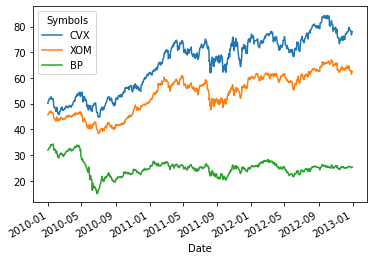

In [331]:
prices.plot()
# 視覚化することでCVXとXOMの株価の推移が類似した傾向であることがわかる

In [348]:
import seaborn as sns
import matplotlib.pyplot as plt

In [352]:
# これらの二社の動きを示す相関係数を計算する
rates.corr()

Symbols,CVX,XOM,BP
Symbols,,,
CVX,1.000000,0.854832,0.589713
XOM,0.854832,1.000000,0.617925
BP,0.589713,0.617925,1.000000


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

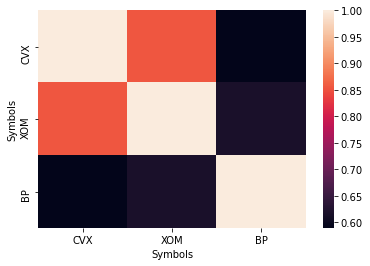

In [353]:
# 各社の間の相関係数を視覚的に示すheatmapライブラリ
sns.heatmap(rates.corr())

In [354]:
# 重複したデータの取り除き

In [355]:
ser1 = Series(["w","w","x","y","z","w","w","x","x","y","a","z"])

In [356]:
ser1

0     w
1     w
2     x
3     y
4     z
5     w
6     w
7     x
8     x
9     y
10    a
11    z
dtype: object

In [357]:
ser1.unique()
# uniqueメソッド：重複したデータをまとめてくれる

array(['w', 'x', 'y', 'z', 'a'], dtype=object)

In [358]:
ser1.value_counts()
# 重複したデータの個数を示してくれる

w    4
x    3
z    2
y    2
a    1
dtype: int64

# 欠損値の扱い

In [38]:
import numpy as np
from pandas import Series,DataFrame
import pandas as pd
from numpy import nan
# not an number

In [39]:
data = Series(["one","two",nan,"four"])

In [40]:
data

0     one
1     two
2     NaN
3    four
dtype: object

In [41]:
data.isnull()
# isnullメソッド:null値の場所を調べることができる

0    False
1    False
2     True
3    False
dtype: bool

In [42]:
data.dropna()
# dropnaメソッド:インデックスを保持したままnull値を取り除くことができる

0     one
1     two
3    four
dtype: object

In [43]:
dframe = DataFrame([[1,2,3],[nan,5,6],[7,nan,9],[nan,nan,nan]])

In [44]:
dframe

,0,1,2
0,1.0,2.0,3.0
1,NaN,5.0,6.0
2,7.0,NaN,9.0
3,NaN,NaN,NaN


In [45]:
dframe.dropna()
# データフレームの場合、dropnaメソッドはnull値を持つ行を全て取り除く

,0,1,2
0,1.0,2.0,3.0


In [46]:
dframe.dropna(how="all")
# 引数をhow="all"とすると全ての要素がnull値の行のみを取り除くことができる

,0,1,2
0,1.0,2.0,3.0
1,NaN,5.0,6.0
2,7.0,NaN,9.0


In [47]:
dframe.dropna(axis=1)
# 欠損値を持つ列を消すと全て消えてしまうことがわかる

""
0
1
2
3


In [48]:
dframe2 = DataFrame([[1,2,3,nan],[2,nan,5,6],[nan,7,nan,9],[1,nan,nan,nan]])

In [49]:
dframe2

,0,1,2,3
0,1.0,2.0,3.0,NaN
1,2.0,NaN,5.0,6.0
2,NaN,7.0,NaN,9.0
3,1.0,NaN,NaN,NaN


In [50]:
dframe2.dropna(thresh=2)
# threshメソッド:閾値を設定することができる
# 欠損値でない要素が2個以上ある行を残すことができる

,0,1,2,3
0,1.0,2.0,3.0,NaN
1,2.0,NaN,5.0,6.0
2,NaN,7.0,NaN,9.0


In [51]:
dframe2.dropna(thresh=3)

,0,1,2,3
0,1.0,2.0,3.0,NaN
1,2.0,NaN,5.0,6.0


In [52]:
dframe2.fillna(1)
# fillnaメソッド:引数として入力した値で欠損値を置換できる

,0,1,2,3
0,1.0,2.0,3.0,1.0
1,2.0,1.0,5.0,6.0
2,1.0,7.0,1.0,9.0
3,1.0,1.0,1.0,1.0


In [56]:
dframe2.fillna({0:0,1:1,2:2,3:3})
# 辞書型を用いて指定するとカラムごとに置換する値を指定できる

,0,1,2,3
0,1.0,2.0,3.0,0.0
1,2.0,0.0,5.0,6.0
2,0.0,7.0,0.0,9.0
3,1.0,0.0,0.0,0.0


In [60]:
# inplace=Trueでデータフレームを直接変更する
dframe2.fillna(0,inplace=True)
# デフォルトはinplace=Falseでありコピーを返すが、Trueはオブジェクト自体を変更する

In [61]:
dframe2
# inplace=Trueによってオブジェクト自体が変更されている

,0,1,2,3
0,1.0,2.0,3.0,0.0
1,2.0,0.0,5.0,6.0
2,0.0,7.0,0.0,9.0
3,1.0,0.0,0.0,0.0


# インデックスの階層構造

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import randn

In [3]:
ser = Series(np.random.randn(6),index=[[1,1,1,2,2,2,],["a","b","c","a","b","c"]])
# インデックスを二重構造にするにはリストを二重にする

In [5]:
ser
# インデックスが階層構造になっている

1  a    0.316973
   b    0.385847
   c    0.252894
2  a    1.259004
   b   -0.716533
   c   -0.871366
dtype: float64

In [6]:
ser.index

MultiIndex([(1, 'a'),
            (1, 'b'),
            (1, 'c'),
            (2, 'a'),
            (2, 'b'),
            (2, 'c')],
           )

In [8]:
ser[1]

a    0.316973
b    0.385847
c    0.252894
dtype: float64

In [9]:
ser[2]

a    1.259004
b   -0.716533
c   -0.871366
dtype: float64

In [11]:
ser

1  a    0.316973
   b    0.385847
   c    0.252894
2  a    1.259004
   b   -0.716533
   c   -0.871366
dtype: float64

In [12]:
ser[:,"a"]
# 最上位の階層すべてからaだけを取り出すということ

1    0.316973
2    1.259004
dtype: float64

In [16]:
ser[2,"b"]
# 2のbのみ取り出す

-0.7165327571828289

In [17]:
dframe = ser.unstack()
# unstackメソッド:シリーズの階層構造をデータフレームにすることができる

In [18]:
dframe

,a,b,c
1,0.316973,0.385847,0.252894
2,1.259004,-0.716533,-0.871366


In [19]:
dframe.unstack()
# データフレームにunstackをかけるとシリーズに戻るが、列が上位に来る

a  1    0.316973
   2    1.259004
b  1    0.385847
   2   -0.716533
c  1    0.252894
   2   -0.871366
dtype: float64

In [23]:
# 転置してからunstackをかければ元に戻る
dframe.T

,1,2
a,0.316973,1.259004
b,0.385847,-0.716533
c,0.252894,-0.871366


In [24]:
dframe.T.unstack()

1  a    0.316973
   b    0.385847
   c    0.252894
2  a    1.259004
   b   -0.716533
   c   -0.871366
dtype: float64

In [26]:
dframe2 = DataFrame(np.arange(16).reshape((4,4)),
                   index=[["a","a","b","b"],[1,2,1,2]],
                   columns=[["NY","NY","LA","SF"],["cold","hot","hot","cold"]])

In [29]:
dframe2

NY      LA   SF
    cold hot hot cold
a 1    0   1   2    3
  2    4   5   6    7
b 1    8   9  10   11
  2   12  13  14   15

In [30]:
dframe2.index.names = ["INDEX_1","INDEX_2"]

In [31]:
dframe2

NY      LA   SF
                cold hot hot cold
INDEX_1 INDEX_2                  
a       1          0   1   2    3
        2          4   5   6    7
b       1          8   9  10   11
        2         12  13  14   15

In [32]:
dframe2.columns.names = ["Cities","Temp"]

In [33]:
dframe2

Cities            NY      LA   SF
Temp            cold hot hot cold
INDEX_1 INDEX_2                  
a       1          0   1   2    3
        2          4   5   6    7
b       1          8   9  10   11
        2         12  13  14   15

In [37]:
dframe2.swaplevel("Cities","Temp",axis=1)
# カラムを行に沿って(axis=1)入れ替える

Temp            cold hot     cold
Cities            NY  NY  LA   SF
INDEX_1 INDEX_2                  
a       1          0   1   2    3
        2          4   5   6    7
b       1          8   9  10   11
        2         12  13  14   15

In [42]:
dframe2.sort_index(level=1)
# インデックスをソートする時、引数に任意の階層(0>1)を渡して並び替える

Cities            NY      LA   SF
Temp            cold hot hot cold
INDEX_1 INDEX_2                  
a       1          0   1   2    3
b       1          8   9  10   11
a       2          4   5   6    7
b       2         12  13  14   15

In [43]:
dframe2.sort_index(level=1).sort_index(level=0)
# INDEX_2について並べ替えてからINDEX_1について並べ替えるので元に戻る

Cities            NY      LA   SF
Temp            cold hot hot cold
INDEX_1 INDEX_2                  
a       1          0   1   2    3
        2          4   5   6    7
b       1          8   9  10   11
        2         12  13  14   15

In [45]:
# 階層のレベルに応じた計算
dframe2.sum(level="Temp",axis=1)
# 都市名は無視して気温のみ共通したデータを足し合わせる

Temp             cold  hot
INDEX_1 INDEX_2           
a       1           3    3
        2          11   11
b       1          19   19
        2          27   27